In [5]:
import keras
import numpy as np
import keras
import tensorflow as tf
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import SGD, Adam
from keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt
import gc
%matplotlib inline

In [6]:
import tensorflow as tf
from keras.backend.tensorflow_backend import set_session
config = tf.ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.7
set_session(tf.Session(config=config))

# Data Preprocessing

In [7]:
batch_size = 512
num_classes = 10
epochs = 200

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
# describe data set
print("Shape of training data:")
print(x_train.shape)
print(y_train.shape)
print("Shape of test data:")
print(x_test.shape)
print(y_test.shape)
# Transform images from (32,32,3) to (32*32*3)
x_train = x_train.reshape(50000, 3072)
x_test = x_test.reshape(10000, 3072)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
#Normalization
x_train /= 255
x_test /= 255
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)





Shape of training data:
(50000, 32, 32, 3)
(50000, 1)
Shape of test data:
(10000, 32, 32, 3)
(10000, 1)


# 1st model: SGD optimizer

In [4]:
model = Sequential()
model.add(Dense(256, activation='relu', input_shape=(3072,)))
model.add(Dense(256, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
model.summary()

model.compile(loss='categorical_crossentropy',
 optimizer=SGD(),
 metrics=['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               786688    
_________________________________________________________________
dense_2 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                2570      
Total params: 855,050
Trainable params: 855,050
Non-trainable params: 0
_________________________________________________________________


In [5]:
filepath="sgd.hdf5"
checkpointer = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')

In [6]:
history = model.fit(x_train, y_train,
 batch_size=batch_size,
 epochs=epochs,
 verbose=1,
 callbacks=[checkpointer],
 validation_data=(x_test, y_test))

Train on 50000 samples, validate on 10000 samples
Epoch 1/200
50000/50000 [==============================] - 5s 97us/step - loss: 2.1516 - acc: 0.2297 - val_loss: 2.0439 - val_acc: 0.2824

Epoch 00001: val_acc improved from -inf to 0.28240, saving model to sgd.hdf5
Epoch 2/200
50000/50000 [==============================] - 2s 49us/step - loss: 1.9854 - acc: 0.3073 - val_loss: 1.9414 - val_acc: 0.3129

Epoch 00002: val_acc improved from 0.28240 to 0.31290, saving model to sgd.hdf5
Epoch 3/200
50000/50000 [==============================] - 2s 49us/step - loss: 1.9071 - acc: 0.3375 - val_loss: 1.8875 - val_acc: 0.3372

Epoch 00003: val_acc improved from 0.31290 to 0.33720, saving model to sgd.hdf5
Epoch 4/200
50000/50000 [==============================] - 2s 49us/step - loss: 1.8598 - acc: 0.3547 - val_loss: 1.8386 - val_acc: 0.3580

Epoch 00004: val_acc improved from 0.33720 to 0.35800, saving model to sgd.hdf5
Epoch 5/200
50000/50000 [==============================] - 3s 58us/step - los

50000/50000 [==============================] - 3s 52us/step - loss: 1.5041 - acc: 0.4762 - val_loss: 1.5219 - val_acc: 0.4631

Epoch 00040: val_acc improved from 0.46170 to 0.46310, saving model to sgd.hdf5
Epoch 41/200
50000/50000 [==============================] - 3s 54us/step - loss: 1.5020 - acc: 0.4764 - val_loss: 1.5396 - val_acc: 0.4582

Epoch 00041: val_acc did not improve from 0.46310
Epoch 42/200
50000/50000 [==============================] - 3s 51us/step - loss: 1.4983 - acc: 0.4782 - val_loss: 1.5552 - val_acc: 0.4485

Epoch 00042: val_acc did not improve from 0.46310
Epoch 43/200
50000/50000 [==============================] - 3s 50us/step - loss: 1.4916 - acc: 0.4804 - val_loss: 1.5250 - val_acc: 0.4626

Epoch 00043: val_acc did not improve from 0.46310
Epoch 44/200
50000/50000 [==============================] - 3s 50us/step - loss: 1.4848 - acc: 0.4837 - val_loss: 1.5730 - val_acc: 0.4380

Epoch 00044: val_acc did not improve from 0.46310
Epoch 45/200
50000/50000 [=======

50000/50000 [==============================] - 3s 51us/step - loss: 1.3501 - acc: 0.5289 - val_loss: 1.4075 - val_acc: 0.5034

Epoch 00081: val_acc improved from 0.49710 to 0.50340, saving model to sgd.hdf5
Epoch 82/200
50000/50000 [==============================] - 3s 50us/step - loss: 1.3491 - acc: 0.5298 - val_loss: 1.4122 - val_acc: 0.4971

Epoch 00082: val_acc did not improve from 0.50340
Epoch 83/200
50000/50000 [==============================] - 2s 49us/step - loss: 1.3428 - acc: 0.5308 - val_loss: 1.4149 - val_acc: 0.4978

Epoch 00083: val_acc did not improve from 0.50340
Epoch 84/200
50000/50000 [==============================] - 3s 52us/step - loss: 1.3398 - acc: 0.5322 - val_loss: 1.4264 - val_acc: 0.4908

Epoch 00084: val_acc did not improve from 0.50340
Epoch 85/200
50000/50000 [==============================] - 3s 58us/step - loss: 1.3379 - acc: 0.5349 - val_loss: 1.5338 - val_acc: 0.4537

Epoch 00085: val_acc did not improve from 0.50340
Epoch 86/200
50000/50000 [=======

50000/50000 [==============================] - 4s 70us/step - loss: 1.2447 - acc: 0.5655 - val_loss: 1.3709 - val_acc: 0.5115

Epoch 00123: val_acc did not improve from 0.51920
Epoch 124/200
50000/50000 [==============================] - 3s 61us/step - loss: 1.2329 - acc: 0.5696 - val_loss: 1.3833 - val_acc: 0.5067

Epoch 00124: val_acc did not improve from 0.51920
Epoch 125/200
50000/50000 [==============================] - 3s 51us/step - loss: 1.2328 - acc: 0.5687 - val_loss: 1.3593 - val_acc: 0.5144

Epoch 00125: val_acc did not improve from 0.51920
Epoch 126/200
50000/50000 [==============================] - 3s 55us/step - loss: 1.2317 - acc: 0.5713 - val_loss: 1.3596 - val_acc: 0.5192

Epoch 00126: val_acc improved from 0.51920 to 0.51920, saving model to sgd.hdf5
Epoch 127/200
50000/50000 [==============================] - 3s 64us/step - loss: 1.2314 - acc: 0.5717 - val_loss: 1.3710 - val_acc: 0.5083

Epoch 00127: val_acc did not improve from 0.51920
Epoch 128/200
50000/50000 [==

In [7]:
model.load_weights('sgd.hdf5')

In [8]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1]) 

Test loss: 1.3135810874938965
Test accuracy: 0.537


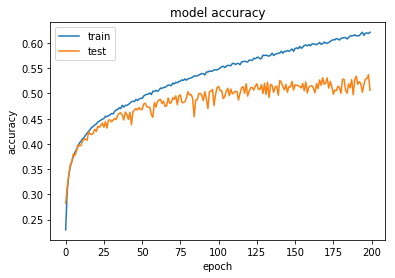

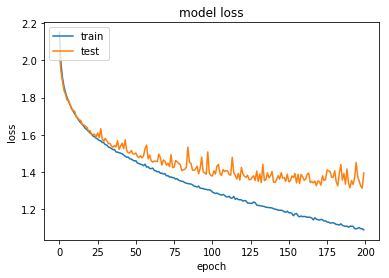

In [9]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [10]:
del model
gc.collect()

5516

# 2nd model: SGD optimizer, +1 layer from the first model

In [11]:
model = Sequential()
model.add(Dense(256, activation='relu', input_shape=(3072,)))
model.add(Dense(256, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
model.summary()

model.compile(loss='categorical_crossentropy',
 optimizer=SGD(),
 metrics=['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 256)               786688    
_________________________________________________________________
dense_5 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_6 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_7 (Dense)              (None, 10)                2570      
Total params: 920,842
Trainable params: 920,842
Non-trainable params: 0
_________________________________________________________________


In [12]:
filepath="sgd_plus_one_layer.hdf5"
checkpointer = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')

In [13]:
history = model.fit(x_train, y_train,
 batch_size=batch_size,
 epochs=epochs,
 verbose=1,
 callbacks=[checkpointer],
 validation_data=(x_test, y_test))

Train on 50000 samples, validate on 10000 samples
Epoch 1/200
50000/50000 [==============================] - 5s 92us/step - loss: 2.1769 - acc: 0.2179 - val_loss: 2.0906 - val_acc: 0.2521

Epoch 00001: val_acc improved from -inf to 0.25210, saving model to sgd_plus_one_layer.hdf5
Epoch 2/200
50000/50000 [==============================] - 3s 55us/step - loss: 2.0280 - acc: 0.2738 - val_loss: 1.9828 - val_acc: 0.2970

Epoch 00002: val_acc improved from 0.25210 to 0.29700, saving model to sgd_plus_one_layer.hdf5
Epoch 3/200
50000/50000 [==============================] - 3s 53us/step - loss: 1.9475 - acc: 0.3079 - val_loss: 1.9207 - val_acc: 0.3159

Epoch 00003: val_acc improved from 0.29700 to 0.31590, saving model to sgd_plus_one_layer.hdf5
Epoch 4/200
50000/50000 [==============================] - 3s 51us/step - loss: 1.8954 - acc: 0.3288 - val_loss: 1.8801 - val_acc: 0.3371

Epoch 00004: val_acc improved from 0.31590 to 0.33710, saving model to sgd_plus_one_layer.hdf5
Epoch 5/200
50000

50000/50000 [==============================] - 3s 64us/step - loss: 1.3247 - acc: 0.5336 - val_loss: 1.4201 - val_acc: 0.4970

Epoch 00079: val_acc did not improve from 0.50640
Epoch 80/200
50000/50000 [==============================] - 3s 58us/step - loss: 1.3294 - acc: 0.5329 - val_loss: 1.4296 - val_acc: 0.4902

Epoch 00080: val_acc did not improve from 0.50640
Epoch 81/200
50000/50000 [==============================] - 3s 60us/step - loss: 1.3192 - acc: 0.5370 - val_loss: 1.4437 - val_acc: 0.4895

Epoch 00081: val_acc did not improve from 0.50640
Epoch 82/200
50000/50000 [==============================] - 3s 62us/step - loss: 1.3236 - acc: 0.5344 - val_loss: 1.4035 - val_acc: 0.5029

Epoch 00082: val_acc did not improve from 0.50640
Epoch 83/200
50000/50000 [==============================] - 3s 68us/step - loss: 1.3173 - acc: 0.5373 - val_loss: 1.4196 - val_acc: 0.4941

Epoch 00083: val_acc did not improve from 0.50640
Epoch 84/200
50000/50000 [==============================] - 4s 

50000/50000 [==============================] - 5s 98us/step - loss: 1.1014 - acc: 0.6166 - val_loss: 1.3584 - val_acc: 0.5211

Epoch 00161: val_acc did not improve from 0.53750
Epoch 162/200
50000/50000 [==============================] - 4s 86us/step - loss: 1.1066 - acc: 0.6139 - val_loss: 1.3520 - val_acc: 0.5192

Epoch 00162: val_acc did not improve from 0.53750
Epoch 163/200
50000/50000 [==============================] - 4s 81us/step - loss: 1.1036 - acc: 0.6133 - val_loss: 1.4216 - val_acc: 0.5020

Epoch 00163: val_acc did not improve from 0.53750
Epoch 164/200
50000/50000 [==============================] - 4s 79us/step - loss: 1.1075 - acc: 0.6117 - val_loss: 1.3353 - val_acc: 0.5252

Epoch 00164: val_acc did not improve from 0.53750
Epoch 165/200
50000/50000 [==============================] - 4s 79us/step - loss: 1.0897 - acc: 0.6205 - val_loss: 1.3056 - val_acc: 0.5398

Epoch 00165: val_acc improved from 0.53750 to 0.53980, saving model to sgd_plus_one_layer.hdf5
Epoch 166/200


In [15]:
model.load_weights('sgd_plus_one_layer.hdf5')

In [16]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1]) 

Test loss: 1.3055981627464295
Test accuracy: 0.5398


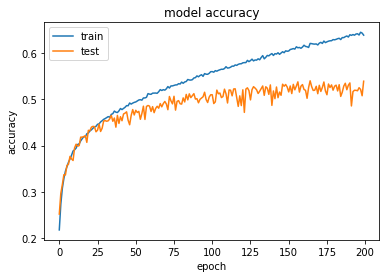

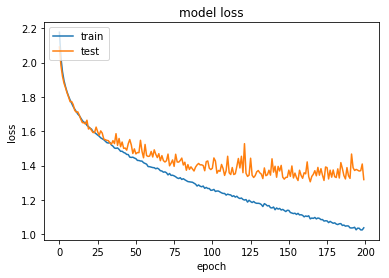

In [17]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [18]:
del model
gc.collect()

5494

# 3rd model: SGD optimizer, +2 layers from the first model

In [19]:
model = Sequential()
model.add(Dense(256, activation='relu', input_shape=(3072,)))
model.add(Dense(256, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
model.summary()

model.compile(loss='categorical_crossentropy',
 optimizer=SGD(),
 metrics=['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 256)               786688    
_________________________________________________________________
dense_9 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_10 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_11 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_12 (Dense)             (None, 10)                1290      
Total params: 952,458
Trainable params: 952,458
Non-trainable params: 0
_________________________________________________________________


In [20]:
filepath="sgd_plus_two_layers.hdf5"
checkpointer = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')

In [21]:
history = model.fit(x_train, y_train,
 batch_size=batch_size,
 epochs=epochs,
 verbose=1,
 callbacks=[checkpointer],
 validation_data=(x_test, y_test))

Train on 50000 samples, validate on 10000 samples
Epoch 1/200
50000/50000 [==============================] - 5s 93us/step - loss: 2.2028 - acc: 0.2093 - val_loss: 2.1045 - val_acc: 0.2560

Epoch 00001: val_acc improved from -inf to 0.25600, saving model to sgd_plus_two_layers.hdf5
Epoch 2/200
50000/50000 [==============================] - 3s 56us/step - loss: 2.0388 - acc: 0.2791 - val_loss: 1.9901 - val_acc: 0.2879

Epoch 00002: val_acc improved from 0.25600 to 0.28790, saving model to sgd_plus_two_layers.hdf5
Epoch 3/200
50000/50000 [==============================] - 3s 55us/step - loss: 1.9510 - acc: 0.3081 - val_loss: 1.9253 - val_acc: 0.3022

Epoch 00003: val_acc improved from 0.28790 to 0.30220, saving model to sgd_plus_two_layers.hdf5
Epoch 4/200
50000/50000 [==============================] - 3s 60us/step - loss: 1.9011 - acc: 0.3248 - val_loss: 1.8767 - val_acc: 0.3273

Epoch 00004: val_acc improved from 0.30220 to 0.32730, saving model to sgd_plus_two_layers.hdf5
Epoch 5/200
5

50000/50000 [==============================] - 3s 57us/step - loss: 1.4941 - acc: 0.4713 - val_loss: 1.5570 - val_acc: 0.4508

Epoch 00038: val_acc did not improve from 0.46930
Epoch 39/200
50000/50000 [==============================] - 3s 57us/step - loss: 1.4979 - acc: 0.4726 - val_loss: 1.5432 - val_acc: 0.4490

Epoch 00039: val_acc did not improve from 0.46930
Epoch 40/200
50000/50000 [==============================] - 3s 63us/step - loss: 1.4937 - acc: 0.4722 - val_loss: 1.5392 - val_acc: 0.4528

Epoch 00040: val_acc did not improve from 0.46930
Epoch 41/200
50000/50000 [==============================] - 3s 61us/step - loss: 1.4813 - acc: 0.4784 - val_loss: 1.5164 - val_acc: 0.4639

Epoch 00041: val_acc did not improve from 0.46930
Epoch 42/200
50000/50000 [==============================] - 3s 59us/step - loss: 1.4804 - acc: 0.4788 - val_loss: 1.5039 - val_acc: 0.4719

Epoch 00042: val_acc improved from 0.46930 to 0.47190, saving model to sgd_plus_two_layers.hdf5
Epoch 43/200
5000

50000/50000 [==============================] - 4s 90us/step - loss: 1.3078 - acc: 0.5374 - val_loss: 1.4264 - val_acc: 0.4980

Epoch 00079: val_acc did not improve from 0.50730
Epoch 80/200
50000/50000 [==============================] - 4s 84us/step - loss: 1.3110 - acc: 0.5382 - val_loss: 1.4246 - val_acc: 0.4950

Epoch 00080: val_acc did not improve from 0.50730
Epoch 81/200
50000/50000 [==============================] - 4s 87us/step - loss: 1.2945 - acc: 0.5437 - val_loss: 1.3976 - val_acc: 0.5005

Epoch 00081: val_acc did not improve from 0.50730
Epoch 82/200
50000/50000 [==============================] - 4s 83us/step - loss: 1.2947 - acc: 0.5416 - val_loss: 1.4468 - val_acc: 0.4961

Epoch 00082: val_acc did not improve from 0.50730
Epoch 83/200
50000/50000 [==============================] - 4s 84us/step - loss: 1.2919 - acc: 0.5443 - val_loss: 1.3915 - val_acc: 0.5099

Epoch 00083: val_acc improved from 0.50730 to 0.50990, saving model to sgd_plus_two_layers.hdf5
Epoch 84/200
5000

50000/50000 [==============================] - 4s 87us/step - loss: 1.0474 - acc: 0.6317 - val_loss: 1.3815 - val_acc: 0.5188

Epoch 00162: val_acc did not improve from 0.53680
Epoch 163/200
50000/50000 [==============================] - 4s 87us/step - loss: 1.0490 - acc: 0.6328 - val_loss: 1.3550 - val_acc: 0.5273

Epoch 00163: val_acc did not improve from 0.53680
Epoch 164/200
50000/50000 [==============================] - 5s 95us/step - loss: 1.0403 - acc: 0.6332 - val_loss: 1.4222 - val_acc: 0.5099

Epoch 00164: val_acc did not improve from 0.53680
Epoch 165/200
50000/50000 [==============================] - 4s 87us/step - loss: 1.0429 - acc: 0.6331 - val_loss: 1.4014 - val_acc: 0.5108

Epoch 00165: val_acc did not improve from 0.53680
Epoch 166/200
50000/50000 [==============================] - 5s 91us/step - loss: 1.0366 - acc: 0.6355 - val_loss: 1.4481 - val_acc: 0.4987

Epoch 00166: val_acc did not improve from 0.53680
Epoch 167/200
50000/50000 [==============================] 

In [22]:
model.load_weights('sgd_plus_two_layers.hdf5')

In [23]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1]) 

Test loss: 1.322081696510315
Test accuracy: 0.5447


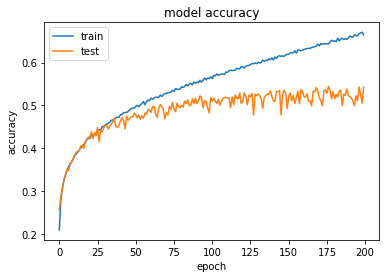

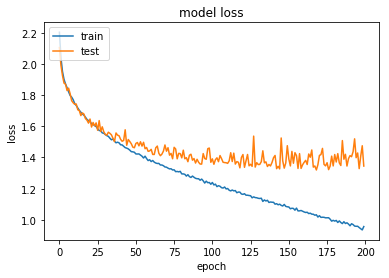

In [24]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [25]:
del model
gc.collect()

5385

# 4th model: Adam optimizer

In [28]:
model = Sequential()
model.add(Dense(256, activation='relu', input_shape=(3072,)))
model.add(Dense(256, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
model.summary()

model.compile(loss ='categorical_crossentropy',
 optimizer = Adam(),
 metrics = ['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_17 (Dense)             (None, 256)               786688    
_________________________________________________________________
dense_18 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_19 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_20 (Dense)             (None, 10)                2570      
Total params: 920,842
Trainable params: 920,842
Non-trainable params: 0
_________________________________________________________________


In [29]:
filepath="adam.hdf5"
checkpointer = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')

In [30]:
history = model.fit(x_train, y_train,
 batch_size=batch_size,
 epochs=epochs,
 verbose=1,
 callbacks=[checkpointer],
 validation_data=(x_test, y_test))

Train on 50000 samples, validate on 10000 samples
Epoch 1/200
50000/50000 [==============================] - 5s 107us/step - loss: 1.9387 - acc: 0.2981 - val_loss: 1.7599 - val_acc: 0.3743

Epoch 00001: val_acc improved from -inf to 0.37430, saving model to adam.hdf5
Epoch 2/200
50000/50000 [==============================] - 3s 64us/step - loss: 1.7172 - acc: 0.3851 - val_loss: 1.6953 - val_acc: 0.3974

Epoch 00002: val_acc improved from 0.37430 to 0.39740, saving model to adam.hdf5
Epoch 3/200
50000/50000 [==============================] - 3s 65us/step - loss: 1.6285 - acc: 0.4177 - val_loss: 1.5998 - val_acc: 0.4307

Epoch 00003: val_acc improved from 0.39740 to 0.43070, saving model to adam.hdf5
Epoch 4/200
50000/50000 [==============================] - 3s 64us/step - loss: 1.5529 - acc: 0.4464 - val_loss: 1.5220 - val_acc: 0.4581

Epoch 00004: val_acc improved from 0.43070 to 0.45810, saving model to adam.hdf5
Epoch 5/200
50000/50000 [==============================] - 3s 66us/step 


Epoch 00041: val_acc did not improve from 0.53270
Epoch 42/200
50000/50000 [==============================] - 4s 74us/step - loss: 0.7579 - acc: 0.7327 - val_loss: 1.5391 - val_acc: 0.5232

Epoch 00042: val_acc did not improve from 0.53270
Epoch 43/200
50000/50000 [==============================] - 5s 97us/step - loss: 0.7349 - acc: 0.7410 - val_loss: 1.6025 - val_acc: 0.5128

Epoch 00043: val_acc did not improve from 0.53270
Epoch 44/200
50000/50000 [==============================] - 5s 100us/step - loss: 0.7193 - acc: 0.7482 - val_loss: 1.6108 - val_acc: 0.5180

Epoch 00044: val_acc did not improve from 0.53270
Epoch 45/200
50000/50000 [==============================] - 5s 99us/step - loss: 0.7030 - acc: 0.7552 - val_loss: 1.5752 - val_acc: 0.5237

Epoch 00045: val_acc did not improve from 0.53270
Epoch 46/200
50000/50000 [==============================] - 6s 111us/step - loss: 0.6826 - acc: 0.7601 - val_loss: 1.6430 - val_acc: 0.5122

Epoch 00046: val_acc did not improve from 0.532

50000/50000 [==============================] - 5s 105us/step - loss: 0.1400 - acc: 0.9498 - val_loss: 3.7497 - val_acc: 0.4995

Epoch 00127: val_acc did not improve from 0.53270
Epoch 128/200
50000/50000 [==============================] - 5s 109us/step - loss: 0.1260 - acc: 0.9559 - val_loss: 3.7579 - val_acc: 0.4916

Epoch 00128: val_acc did not improve from 0.53270
Epoch 129/200
50000/50000 [==============================] - 6s 111us/step - loss: 0.1473 - acc: 0.9476 - val_loss: 3.7755 - val_acc: 0.4944

Epoch 00129: val_acc did not improve from 0.53270
Epoch 130/200
50000/50000 [==============================] - 6s 117us/step - loss: 0.1357 - acc: 0.9525 - val_loss: 3.8296 - val_acc: 0.4930

Epoch 00130: val_acc did not improve from 0.53270
Epoch 131/200
50000/50000 [==============================] - 6s 118us/step - loss: 0.1007 - acc: 0.9666 - val_loss: 3.8620 - val_acc: 0.4959s - loss: 0.1003 - acc:

Epoch 00131: val_acc did not improve from 0.53270
Epoch 132/200
50000/50000 [====

In [31]:
model.load_weights('adam.hdf5')

In [32]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1]) 

Test loss: 1.4172240785598755
Test accuracy: 0.5327


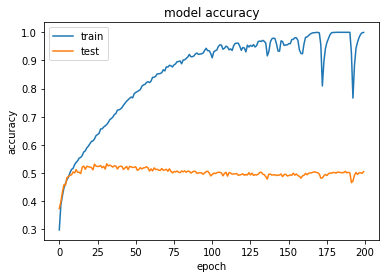

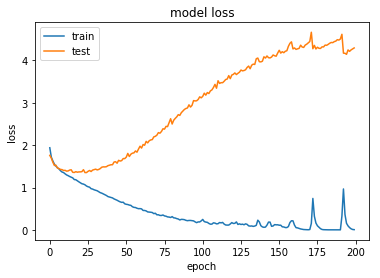

In [33]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
del model
gc.collect()

# 5th model: Adam optimizer, Dropout

In [9]:
model = Sequential()
model.add(Dense(256, activation='relu', input_shape=(3072,)))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(256, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
model.summary()

model.compile(loss ='categorical_crossentropy',
 optimizer = Adam(),
 metrics = ['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               786688    
_________________________________________________________________
dense_2 (Dense)              (None, 256)               65792     
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                2570      
Total params: 920,842
Trainable params: 920,842
Non-trainable params: 0
_________________________________________________________________


In [10]:
filepath="adam_dropout.hdf5"
checkpointer = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')

In [11]:
history = model.fit(x_train, y_train,
 batch_size=batch_size,
 epochs=epochs,
 verbose=1,
 callbacks=[checkpointer],
 validation_data=(x_test, y_test))

Train on 50000 samples, validate on 10000 samples
Epoch 1/200
50000/50000 [==============================] - 6s 125us/step - loss: 1.9542 - acc: 0.2884 - val_loss: 1.7696 - val_acc: 0.3609

Epoch 00001: val_acc improved from -inf to 0.36090, saving model to adam_dropout.hdf5
Epoch 2/200
50000/50000 [==============================] - 3s 61us/step - loss: 1.7291 - acc: 0.3779 - val_loss: 1.6576 - val_acc: 0.4081

Epoch 00002: val_acc improved from 0.36090 to 0.40810, saving model to adam_dropout.hdf5
Epoch 3/200
50000/50000 [==============================] - 3s 64us/step - loss: 1.6468 - acc: 0.4122 - val_loss: 1.5642 - val_acc: 0.4447

Epoch 00003: val_acc improved from 0.40810 to 0.44470, saving model to adam_dropout.hdf5
Epoch 4/200
50000/50000 [==============================] - 3s 66us/step - loss: 1.5834 - acc: 0.4374 - val_loss: 1.5502 - val_acc: 0.4434

Epoch 00004: val_acc did not improve from 0.44470
Epoch 5/200
50000/50000 [==============================] - 4s 71us/step - loss:


Epoch 00040: val_acc did not improve from 0.54210
Epoch 41/200
50000/50000 [==============================] - 3s 65us/step - loss: 1.0108 - acc: 0.6352 - val_loss: 1.3336 - val_acc: 0.5473

Epoch 00041: val_acc improved from 0.54210 to 0.54730, saving model to adam_dropout.hdf5
Epoch 42/200
50000/50000 [==============================] - 3s 64us/step - loss: 1.0205 - acc: 0.6315 - val_loss: 1.3445 - val_acc: 0.5338

Epoch 00042: val_acc did not improve from 0.54730
Epoch 43/200
50000/50000 [==============================] - 3s 64us/step - loss: 1.0040 - acc: 0.6387 - val_loss: 1.3584 - val_acc: 0.5360

Epoch 00043: val_acc did not improve from 0.54730
Epoch 44/200
50000/50000 [==============================] - 3s 62us/step - loss: 0.9930 - acc: 0.6424 - val_loss: 1.3274 - val_acc: 0.5435

Epoch 00044: val_acc did not improve from 0.54730
Epoch 45/200
50000/50000 [==============================] - 3s 62us/step - loss: 0.9725 - acc: 0.6508 - val_loss: 1.3383 - val_acc: 0.5451

Epoch 0004

50000/50000 [==============================] - 3s 63us/step - loss: 0.7625 - acc: 0.7218 - val_loss: 1.5468 - val_acc: 0.5349

Epoch 00083: val_acc did not improve from 0.54730
Epoch 84/200
50000/50000 [==============================] - 3s 64us/step - loss: 0.7519 - acc: 0.7248 - val_loss: 1.5159 - val_acc: 0.5343

Epoch 00084: val_acc did not improve from 0.54730
Epoch 85/200
50000/50000 [==============================] - 3s 63us/step - loss: 0.7519 - acc: 0.7246 - val_loss: 1.5611 - val_acc: 0.5224

Epoch 00085: val_acc did not improve from 0.54730
Epoch 86/200
50000/50000 [==============================] - 3s 63us/step - loss: 0.7565 - acc: 0.7252 - val_loss: 1.5521 - val_acc: 0.5303

Epoch 00086: val_acc did not improve from 0.54730
Epoch 87/200
50000/50000 [==============================] - 3s 65us/step - loss: 0.7315 - acc: 0.7346 - val_loss: 1.5390 - val_acc: 0.5340

Epoch 00087: val_acc did not improve from 0.54730
Epoch 88/200
50000/50000 [==============================] - 4s 

50000/50000 [==============================] - 5s 109us/step - loss: 0.6100 - acc: 0.7776 - val_loss: 1.7007 - val_acc: 0.5339

Epoch 00126: val_acc did not improve from 0.54730
Epoch 127/200
50000/50000 [==============================] - 4s 79us/step - loss: 0.6196 - acc: 0.7729 - val_loss: 1.7486 - val_acc: 0.5230

Epoch 00127: val_acc did not improve from 0.54730
Epoch 128/200
50000/50000 [==============================] - 4s 74us/step - loss: 0.6391 - acc: 0.7680 - val_loss: 1.7218 - val_acc: 0.5288

Epoch 00128: val_acc did not improve from 0.54730
Epoch 129/200
50000/50000 [==============================] - 4s 79us/step - loss: 0.6271 - acc: 0.7702 - val_loss: 1.7404 - val_acc: 0.5246

Epoch 00129: val_acc did not improve from 0.54730
Epoch 130/200
50000/50000 [==============================] - 4s 78us/step - loss: 0.6133 - acc: 0.7778 - val_loss: 1.7171 - val_acc: 0.5303

Epoch 00130: val_acc did not improve from 0.54730
Epoch 131/200
50000/50000 [==============================]

50000/50000 [==============================] - 3s 67us/step - loss: 0.5357 - acc: 0.8053 - val_loss: 1.9119 - val_acc: 0.5193

Epoch 00169: val_acc did not improve from 0.54730
Epoch 170/200
50000/50000 [==============================] - 3s 68us/step - loss: 0.5402 - acc: 0.8028 - val_loss: 1.9047 - val_acc: 0.5217

Epoch 00170: val_acc did not improve from 0.54730
Epoch 171/200
50000/50000 [==============================] - 3s 69us/step - loss: 0.5462 - acc: 0.8016 - val_loss: 1.8820 - val_acc: 0.5227

Epoch 00171: val_acc did not improve from 0.54730
Epoch 172/200
50000/50000 [==============================] - 3s 68us/step - loss: 0.5400 - acc: 0.8053 - val_loss: 1.9015 - val_acc: 0.5243

Epoch 00172: val_acc did not improve from 0.54730
Epoch 173/200
50000/50000 [==============================] - 3s 68us/step - loss: 0.5376 - acc: 0.8043 - val_loss: 1.8931 - val_acc: 0.5154

Epoch 00173: val_acc did not improve from 0.54730
Epoch 174/200
50000/50000 [==============================] 

In [12]:
model.load_weights('adam_dropout.hdf5')

In [13]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1]) 

Test loss: 1.3336399690628051
Test accuracy: 0.5473


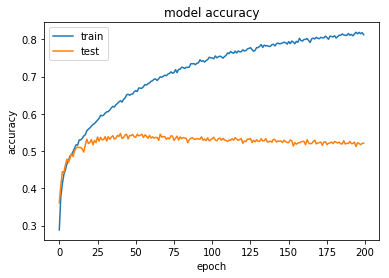

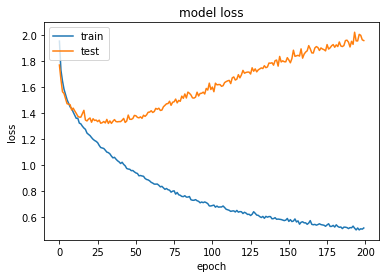

In [14]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [15]:
del model
gc.collect()

5527

# 6th model: SGD optimizer, Dropout, epoch=100, lr=0.001

In [17]:
model = Sequential()
model.add(Dense(256, activation='relu', input_shape=(3072,)))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(256, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
model.summary()

model.compile(loss ='categorical_crossentropy',
 optimizer = SGD(lr=0.001),
 metrics = ['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 256)               786688    
_________________________________________________________________
dense_6 (Dense)              (None, 256)               65792     
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_8 (Dense)              (None, 10)                2570      
Total params: 920,842
Trainable params: 920,842
Non-trainable params: 0
_________________________________________________________________


In [18]:
filepath="SGD_dropout.hdf5"
checkpointer = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')

In [19]:
history = model.fit(x_train, y_train,
 batch_size=1000,
 epochs=100,
 verbose=1,
 callbacks=[checkpointer],
 validation_data=(x_test, y_test))

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 11s 211us/step - loss: 2.3421 - acc: 0.0961 - val_loss: 2.3032 - val_acc: 0.1143

Epoch 00001: val_acc improved from -inf to 0.11430, saving model to SGD_dropout.hdf5
Epoch 2/100
50000/50000 [==============================] - 2s 47us/step - loss: 2.3080 - acc: 0.1111 - val_loss: 2.2853 - val_acc: 0.1364

Epoch 00002: val_acc improved from 0.11430 to 0.13640, saving model to SGD_dropout.hdf5
Epoch 3/100
50000/50000 [==============================] - 2s 47us/step - loss: 2.2933 - acc: 0.1244 - val_loss: 2.2733 - val_acc: 0.1534

Epoch 00003: val_acc improved from 0.13640 to 0.15340, saving model to SGD_dropout.hdf5
Epoch 4/100
50000/50000 [==============================] - 2s 47us/step - loss: 2.2811 - acc: 0.1374 - val_loss: 2.2627 - val_acc: 0.1705

Epoch 00004: val_acc improved from 0.15340 to 0.17050, saving model to SGD_dropout.hdf5
Epoch 5/100
50000/50000 [==================

50000/50000 [==============================] - 2s 48us/step - loss: 2.0466 - acc: 0.2641 - val_loss: 2.0148 - val_acc: 0.2989

Epoch 00037: val_acc improved from 0.29630 to 0.29890, saving model to SGD_dropout.hdf5
Epoch 38/100
50000/50000 [==============================] - 2s 49us/step - loss: 2.0409 - acc: 0.2686 - val_loss: 2.0096 - val_acc: 0.2991

Epoch 00038: val_acc improved from 0.29890 to 0.29910, saving model to SGD_dropout.hdf5
Epoch 39/100
50000/50000 [==============================] - 2s 48us/step - loss: 2.0362 - acc: 0.2683 - val_loss: 2.0047 - val_acc: 0.3002

Epoch 00039: val_acc improved from 0.29910 to 0.30020, saving model to SGD_dropout.hdf5
Epoch 40/100
50000/50000 [==============================] - 2s 48us/step - loss: 2.0307 - acc: 0.2703 - val_loss: 2.0000 - val_acc: 0.3025

Epoch 00040: val_acc improved from 0.30020 to 0.30250, saving model to SGD_dropout.hdf5
Epoch 41/100
50000/50000 [==============================] - 2s 47us/step - loss: 2.0255 - acc: 0.2734

50000/50000 [==============================] - 2s 46us/step - loss: 1.9270 - acc: 0.3125 - val_loss: 1.8960 - val_acc: 0.3297

Epoch 00074: val_acc improved from 0.32910 to 0.32970, saving model to SGD_dropout.hdf5
Epoch 75/100
50000/50000 [==============================] - 2s 46us/step - loss: 1.9235 - acc: 0.3116 - val_loss: 1.8939 - val_acc: 0.3300

Epoch 00075: val_acc improved from 0.32970 to 0.33000, saving model to SGD_dropout.hdf5
Epoch 76/100
50000/50000 [==============================] - 2s 46us/step - loss: 1.9259 - acc: 0.3118 - val_loss: 1.8919 - val_acc: 0.3315

Epoch 00076: val_acc improved from 0.33000 to 0.33150, saving model to SGD_dropout.hdf5
Epoch 77/100
50000/50000 [==============================] - 2s 46us/step - loss: 1.9193 - acc: 0.3138 - val_loss: 1.8899 - val_acc: 0.3317

Epoch 00077: val_acc improved from 0.33150 to 0.33170, saving model to SGD_dropout.hdf5
Epoch 78/100
50000/50000 [==============================] - 2s 47us/step - loss: 1.9186 - acc: 0.3176

In [20]:
model.load_weights('SGD_dropout.hdf5')

In [21]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1]) 

Test loss: 1.8539050498962402
Test accuracy: 0.346


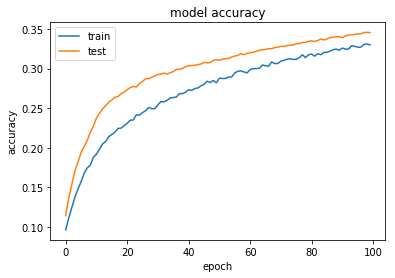

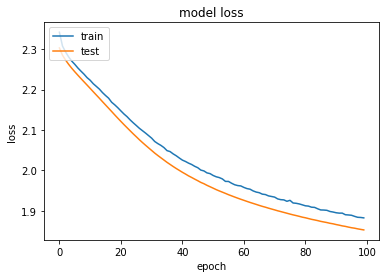

In [22]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [23]:
del model
gc.collect()

5051

# 7th model: SGD optimizer, 2 Dropout(0.5) 

In [24]:
model = Sequential()
model.add(Dense(256, activation='relu', input_shape=(3072,)))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
model.summary()

model.compile(loss ='categorical_crossentropy',
 optimizer = SGD(),
 metrics = ['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 256)               786688    
_________________________________________________________________
dense_10 (Dense)             (None, 256)               65792     
_________________________________________________________________
dropout_3 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 256)               65792     
_________________________________________________________________
dropout_4 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 10)                2570      
Total params: 920,842
Trainable params: 920,842
Non-trainable params: 0
_________________________________________________________________


In [25]:
filepath="SGD_dropout2.hdf5"
checkpointer = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')

In [26]:
history = model.fit(x_train, y_train,
 batch_size=512,
 epochs=100,
 verbose=1,
 callbacks=[checkpointer],
 validation_data=(x_test, y_test))

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 11s 214us/step - loss: 2.3054 - acc: 0.1289 - val_loss: 2.2182 - val_acc: 0.2285

Epoch 00001: val_acc improved from -inf to 0.22850, saving model to SGD_dropout2.hdf5
Epoch 2/100
50000/50000 [==============================] - 3s 56us/step - loss: 2.2238 - acc: 0.1709 - val_loss: 2.1384 - val_acc: 0.2503

Epoch 00002: val_acc improved from 0.22850 to 0.25030, saving model to SGD_dropout2.hdf5
Epoch 3/100
50000/50000 [==============================] - 3s 62us/step - loss: 2.1653 - acc: 0.1956 - val_loss: 2.0721 - val_acc: 0.2799

Epoch 00003: val_acc improved from 0.25030 to 0.27990, saving model to SGD_dropout2.hdf5
Epoch 4/100
50000/50000 [==============================] - 3s 66us/step - loss: 2.1153 - acc: 0.2153 - val_loss: 2.0248 - val_acc: 0.3022

Epoch 00004: val_acc improved from 0.27990 to 0.30220, saving model to SGD_dropout2.hdf5
Epoch 5/100
50000/50000 [==============

50000/50000 [==============================] - 3s 56us/step - loss: 1.7156 - acc: 0.3868 - val_loss: 1.6213 - val_acc: 0.4300

Epoch 00038: val_acc improved from 0.42530 to 0.43000, saving model to SGD_dropout2.hdf5
Epoch 39/100
50000/50000 [==============================] - 3s 56us/step - loss: 1.7088 - acc: 0.3881 - val_loss: 1.6145 - val_acc: 0.4304

Epoch 00039: val_acc improved from 0.43000 to 0.43040, saving model to SGD_dropout2.hdf5
Epoch 40/100
50000/50000 [==============================] - 3s 62us/step - loss: 1.7041 - acc: 0.3913 - val_loss: 1.6044 - val_acc: 0.4334

Epoch 00040: val_acc improved from 0.43040 to 0.43340, saving model to SGD_dropout2.hdf5
Epoch 41/100
50000/50000 [==============================] - 3s 62us/step - loss: 1.6980 - acc: 0.3932 - val_loss: 1.6043 - val_acc: 0.4338

Epoch 00041: val_acc improved from 0.43340 to 0.43380, saving model to SGD_dropout2.hdf5
Epoch 42/100
50000/50000 [==============================] - 3s 58us/step - loss: 1.6955 - acc: 0.


Epoch 00077: val_acc improved from 0.46950 to 0.47100, saving model to SGD_dropout2.hdf5
Epoch 78/100
50000/50000 [==============================] - 3s 61us/step - loss: 1.5575 - acc: 0.4461 - val_loss: 1.4843 - val_acc: 0.4674

Epoch 00078: val_acc did not improve from 0.47100
Epoch 79/100
50000/50000 [==============================] - 3s 61us/step - loss: 1.5581 - acc: 0.4450 - val_loss: 1.4764 - val_acc: 0.4750

Epoch 00079: val_acc improved from 0.47100 to 0.47500, saving model to SGD_dropout2.hdf5
Epoch 80/100
50000/50000 [==============================] - 3s 61us/step - loss: 1.5460 - acc: 0.4476 - val_loss: 1.5219 - val_acc: 0.4638

Epoch 00080: val_acc did not improve from 0.47500
Epoch 81/100
50000/50000 [==============================] - 3s 63us/step - loss: 1.5512 - acc: 0.4513 - val_loss: 1.4990 - val_acc: 0.4679

Epoch 00081: val_acc did not improve from 0.47500
Epoch 82/100
50000/50000 [==============================] - 3s 64us/step - loss: 1.5435 - acc: 0.4504 - val_los

In [27]:
model.load_weights('SGD_dropout2.hdf5')

In [28]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1]) 

Test loss: 1.4591354640960694
Test accuracy: 0.4814


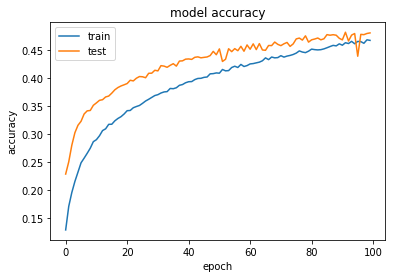

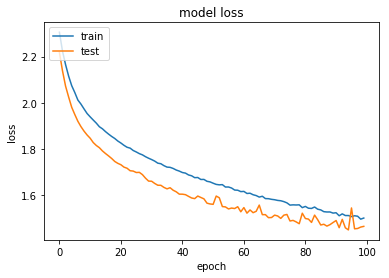

In [29]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [30]:
del model
gc.collect()

5058